In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
from prototype import *
import matplotlib.pyplot as plt
import copy

In [84]:
data = np.load('nbody_golden.npz')
pos = data['pos']

keys = generate_ph_key_from_list(pos)

In [9]:
MAX_INT32 = np.iinfo(np.uint32).max
pos = [0, 0, 0]
print(pos, format(generate_ph_key(pos, MAX_DEPTH), '032b')[2:5])

pos = [MAX_INT32, 0, 0]
print(pos, format(generate_ph_key(pos, MAX_DEPTH), '032b')[2:5])

pos = [0, MAX_INT32, 0]
print(pos, format(generate_ph_key(pos, MAX_DEPTH), '032b')[2:5])

pos = [0, 0, MAX_INT32]
print(pos, format(generate_ph_key(pos, MAX_DEPTH), '032b')[2:5])

pos = [0, MAX_INT32, MAX_INT32]
print(pos, format(generate_ph_key(pos, MAX_DEPTH), '032b')[2:5])

pos = [MAX_INT32, 0, MAX_INT32]
print(pos, format(generate_ph_key(pos, MAX_DEPTH), '032b')[2:5])

pos = [MAX_INT32, MAX_INT32, 0]
print(pos, format(generate_ph_key(pos, MAX_DEPTH), '032b')[2:5])

pos = [MAX_INT32, MAX_INT32, MAX_INT32]
print(pos, format(generate_ph_key(pos, MAX_DEPTH), '032b')[2:5])




[0, 0, 0] 000
[4294967295, 0, 0] 011
[0, 4294967295, 0] 001
[0, 0, 4294967295] 111
[0, 4294967295, 4294967295] 110
[4294967295, 0, 4294967295] 100
[4294967295, 4294967295, 0] 010
[4294967295, 4294967295, 4294967295] 101


In [28]:
data = np.load('nbody_golden.npz')
pos = data['pos']
pos_float = data['pos_float']
acc = data['acc']
M = np.full(pos.shape[0], data['M'])
G = data['G']
eps = data['eps']

print(pos.dtype)

keys = generate_ph_key_from_list(pos)
sorted_indices = np.argsort(keys)
pos = pos[sorted_indices]
pos_float = pos_float[sorted_indices]
acc = acc[sorted_indices]
keys = keys[sorted_indices]

uint32


(0.0, 1.0)

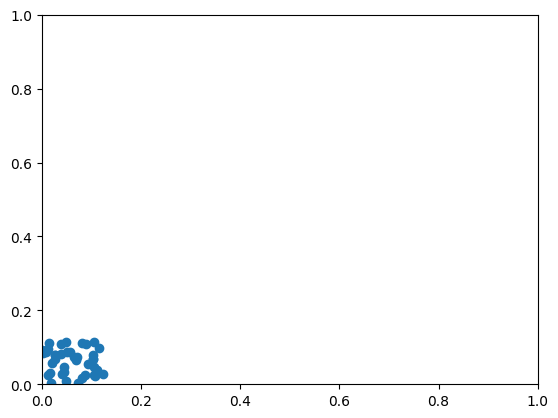

In [13]:
plt.scatter(pos_float[:40,0], pos_float[:40,2])
plt.xlim(0, 1)
plt.ylim(0, 1)

In [155]:
start = 0

key0 = keys[start]
key1 = keys[start+1]
key2 = keys[start+2]
key3 = keys[start+3]
key4 = keys[start+4]
key5 = keys[start+5]
key6 = keys[start+6]
key7 = keys[start+7]
key8 = keys[start+8]
key9 = keys[start+9]
key10 = keys[start+10]
key11 = keys[start+11]

def fmt(key, i):
    return format(key, '032b')[2+i*3:5+i*3]

print('  0', '  1', '  2', '  3', '  4', '  5', '  6', '  7', '  8', '  9', ' 10', ' 11')
for i in range(10):
    print(fmt(key0, i), fmt(key1, i), fmt(key2, i), fmt(key3, i), fmt(key4, i), fmt(key5, i), fmt(key6, i), fmt(key7, i), fmt(key8, i), fmt(key9, i), fmt(key10, i), fmt(key11, i))

  0   1   2   3   4   5   6   7   8   9  10  11
000 000 000 000 000 000 000 000 000 000 000 000
000 000 000 000 000 000 000 000 000 000 000 000
000 000 000 000 000 000 000 000 000 000 000 000
000 000 000 000 000 000 000 000 000 000 000 000
000 000 000 000 000 000 000 000 000 000 000 000
000 000 000 000 000 000 000 000 000 000 000 000
000 000 000 000 000 000 000 000 000 000 000 000
000 000 000 000 000 000 000 000 000 000 000 000
000 000 001 001 001 001 010 010 010 010 010 011
001 110 011 100 110 110 001 001 011 011 101 000


In [29]:
tree = generate_tree(pos_float, keys, M)

In [30]:
for i in range(10):
    if i < len(tree):
        print("{:02d}".format(i), ['F', 'T'][tree[i].is_leaf], format(tree[i].start_idx, '02d'), tree[i].Npart, tree[i].level, format(tree[i].key, '032b'), format(keys[tree[i].start_idx], '032b')[2:])

00 T 9999 1 4 00000000000000000000111111111111 111111111111110101111011000100
01 F 9995 4 4 00000000000000000000111111111101 111111111101000110101110001001
02 T 9998 1 5 00000000000000000111111111101111 111111111101111100100010100110
03 F 9996 2 5 00000000000000000111111111101110 111111111101110101111110111001
04 T 9997 1 6 00000000000000111111111101110111 111111111101110111101111000101
05 T 9996 1 6 00000000000000111111111101110101 111111111101110101111110111001
06 T 9995 1 5 00000000000000000111111111101000 111111111101000110101110001001
07 T 9994 1 4 00000000000000000000111111111011 111111111011001100000000101011
08 T 9993 1 4 00000000000000000000111111111010 111111111010001100010101010110
09 T 9992 1 4 00000000000000000000111111111001 111111111001011011110010011101


In [13]:
start = 0

tree0 = tree[start]
tree1 = tree[start+1]
tree2 = tree[start+2]
tree3 = tree[start+3]
tree4 = tree[start+4]
tree5 = tree[start+5]
tree6 = tree[start+6]
tree7 = tree[start+7]
tree8 = tree[start+8]
tree9 = tree[start+9]
tree10 = tree[start+10]
tree11 = tree[start+11]

def fmt(key, i):
    return format(key, '032b')[2+i*3:5+i*3]

def TorF(node):
    return [' nd', ' lf'][node.is_leaf]

print('  0', '  1', '  2', '  3', '  4', '  5', '  6', '  7', '  8', '  9', ' 10', ' 11')
print(TorF(tree0), TorF(tree1), TorF(tree2), TorF(tree3), TorF(tree4), TorF(tree5), TorF(tree6), TorF(tree7), TorF(tree8), TorF(tree9), TorF(tree10), TorF(tree11))
for i in range(10):
    print(fmt(tree0.key, i), fmt(tree1.key, i), fmt(tree2.key, i), fmt(tree3.key, i), fmt(tree4.key, i), fmt(tree5.key, i), fmt(tree6.key, i), fmt(tree7.key, i), fmt(tree8.key, i), fmt(tree9.key, i), fmt(tree10.key, i), fmt(tree11.key, i))

  0   1   2   3   4   5   6   7   8   9  10  11
 lf  nd  lf  lf  lf  lf  lf  lf  nd  lf  lf  lf
000 000 000 000 000 000 000 000 000 000 000 000
000 000 000 000 000 000 000 000 000 000 000 000
000 000 000 000 000 000 000 000 000 000 000 000
000 000 000 000 000 000 000 000 000 000 000 000
000 000 000 000 000 000 000 000 000 000 000 000
000 000 111 111 111 000 000 000 000 111 111 111
111 111 111 111 111 111 111 111 111 111 111 111
111 111 111 111 111 111 111 111 111 111 111 111
111 111 101 101 101 111 111 111 111 000 000 000
111 101 111 110 000 011 010 001 000 110 101 011


In [127]:
data = np.load('nbody_golden.npz')
pos = data['pos']
pos_float = data['pos_float']
pos_eval = data['pos_eval']
pos_eval_float = data['pos_eval_float']
acc_eval = data['acc_eval']
M = np.full(pos.shape[0], data['M'])
G = data['G']
eps = data['eps']

keys = generate_ph_key_from_list(pos)
sorted_indices = np.argsort(keys)
pos = pos[sorted_indices]
pos_float = pos_float[sorted_indices]
keys = keys[sorted_indices]

tree = generate_tree(pos_float, keys, M)

In [135]:
# def walk_tree(tree, pos, theta=0.5):
pos0 = pos_eval_float[0]
acc = np.zeros(3)
theta = 0.5
Nint_leaf = 0
Nint_node = 0
if True:
    # we start by opening all the top level nodes
    current_level = 1
    for tr in tree:
        # we are ignoring all nodes that are finer (higher) than the current level
        if tr.level > current_level:
            continue

        # if tr.level is smaller than current_level, it means that we've exhausted all the nodes at current level
        # and we are moving on to the next subnode in the parent node
        current_level = tr.level

        # okay, so if we are at a leaf, we loop through all particles and add to our acc
        if tr.is_leaf:
            for i in range(tr.Npart):
                rsq = np.sum((pos_float[tr.start_idx+i] - pos0)**2)
                rcubed = rsq**(3./2.)
                acc += G * M[i] * (pos_float[tr.start_idx+i] - pos0) / rcubed
                Nint_leaf += 1
            continue
        
        # otherwise, we are at a node, so we need to decide whether or not to open it
        # using geometric opening criterion
        Lnode = 1./(2**tr.level)
        d = np.linalg.norm(tr.com - pos0)
        # print(d, Lnode, theta)
        if d < Lnode/theta:
            current_level += 1
        else:
            # we are not opening this node, just use its com to compute acc
            acc += G * tr.mass * (tr.com - pos0) / (np.linalg.norm(tr.com - pos0)**3)
            Nint_node += 1

64 289


In [137]:
acc

array([-1.53464301, -1.60363688, -1.41835796])

In [138]:
acc_eval[0]

array([-1.534611 , -1.605034 , -1.4217494], dtype=float32)

In [125]:
pos_eval[0]

array([4044253383, 2794408322, 1826214100], dtype=uint32)

In [126]:
pos0

array([0.94162613, 0.6506239 , 0.4251986 ], dtype=float32)